<a href="https://colab.research.google.com/github/Rama-Has/Poem_Generator_Rama_Hasiba_12010022/blob/main/English_Poem_Generator_NLP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.models import load_model  

# Building the Text Generator

1. Load the data then perform some EDA.
2. Creating the corpus

> `1. Load the data then perform some EDA.`

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 
# image_name = os.listdir('/content/imgs/Images')

In [ ]:
uploaded_txt = files.upload()

Saving poem.txt to poem.txt


In [8]:
# txt_data = uploaded_txt['poem.txt'].decode("utf-8")
txt_data = open('/content/poem.txt', 'r').read()

In [ ]:
uploaded_csv = files.upload()

Saving merged_data.csv to merged_data.csv


In [10]:
import io
# csv_data = pd.read_csv(io.BytesIO(uploaded_csv['merged_data.csv']))
csv_data = pd.read_csv('/content/merged_data.csv') 

In [11]:
csv_data = csv_data[['Verse']]
csv_data

,Verse
0,ah why this boding start this sudden pain
1,that wings my pulse and shoots from vein to vein
2,what mean regardless of yon midnight bell
3,these earthborn visions saddening o'er my cell
4,what strange disorder prompts these thoughts t...
...,...
198997,were mellow music matchd with him
198998,o life as futile then as frail
198999,o for thy voice to soothe and bless
199000,what hope of answer or redress


In [12]:
# print(txt_data)

> `2. Creating the corpus`

* Text Preprocessing:


    a. Make the text consistant by converting it to a lower case.

    b. Tokenize the text using tensorflow tokenizer.

In [21]:
#Generating the corpus by splitting the text into lines.
corpus = txt_data.lower().split("\n")

In [22]:
corpus[0: 3]

['stay, i said', 'to the cut flowers.', 'they bowed']

In [14]:
csv_poem_lines = [sentence.lower() for sentence in csv_data['Verse'].to_list()[0: 10000]]

In [19]:
csv_poem_lines[0: 5]

['ah why this boding start this sudden pain',
 'that wings my pulse and shoots from vein to vein',
 'what mean regardless of yon midnight bell',
 "these earthborn visions saddening o'er my cell",
 'what strange disorder prompts these thoughts to glow']

In [23]:
corpus = corpus + csv_poem_lines

In [24]:
print(f'There are a atotal of {len(corpus)} poem line in the dataset')

There are a atotal of 12478 poem line in the dataset


In [25]:
corpus[0: 3]

['stay, i said', 'to the cut flowers.', 'they bowed']

In [26]:
#get the length of each linem where length represent number of characters in that line 
line_length = [len(line) for line in corpus]
line_length[0: 5]     

[12, 19, 10, 18, 27]

In [27]:
# !pip install seaborn

In [28]:
import seaborn as sb

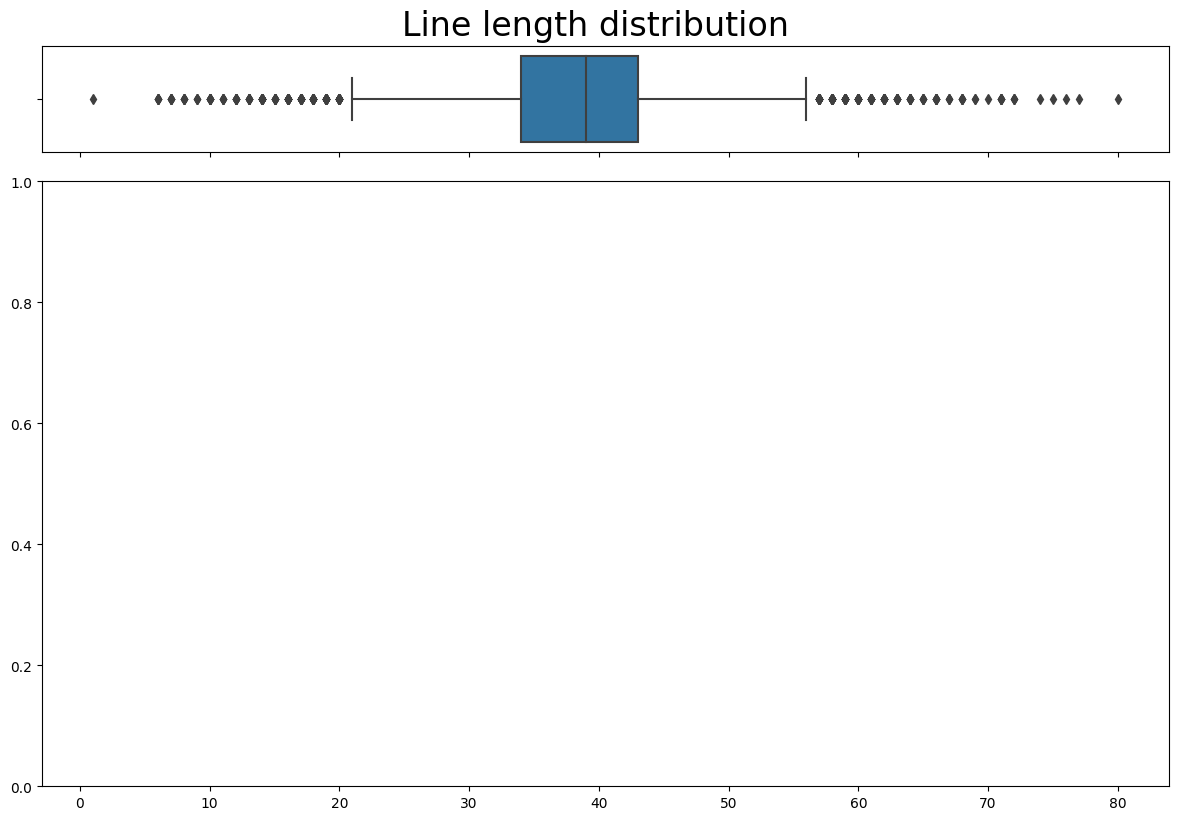

In [29]:
# creating a figure

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
f.set_figheight(8)
f.set_figwidth(12)
f.tight_layout()
f.suptitle('Line length distribution', y=1.02, fontsize=24)

# # assigning a graph to each axis

sb.boxplot(x = line_length, ax=ax_box, )
# sb.histplot(data=data, x="quote_length", ax=ax_hist)
# ax_hist.set_xlabel('Quote length')
# ax_box.set_xlabel('')

plt.show()

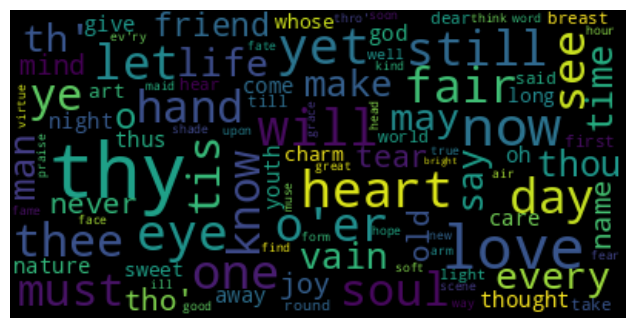

In [30]:
# Generating the wordCloud ti visiualize the text
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="black").generate(" ".join(corpus))
 
# Plotting the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()

> b. Tokenize the text using tensorflow tokenizer.

In [31]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [32]:
# Vocabulary count of the corpus
number_of_words = len(tokenizer.word_index)
 
print("number of words:\n", number_of_words)

number of words:
 11966


3. Vectorization

    a. Generate embedding for every sentence in the corpus.

    b. Convert every sentence to embedding using text_to_sequence() from keras.

    c. Pad all embeddings to the maximum embedded length, by filling zeros. So all embeddings have the same length.

In [33]:
# Generate the n gram sequences. 
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [34]:
#Get the value of maximum length among sequences.
max_sequence_len = max([len(sequence) for sequence in input_sequences])

#Pad sentences
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))

predictors, label = input_sequences[:, :-1], input_sequences[:, -1]

#convert label values to one hot encoded list
label = ku.to_categorical(label, num_classes = number_of_words + 1)

In [35]:
#Embeddings    
predictors[0:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  506],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  506,    8],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    3],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    3,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    3,    1, 1553]], dtype=int32)

> 4. Building the Bi-directional LSTM Model.

In [36]:
max_sequence_len

16

In [37]:
# Create a sequential model
model = Sequential()

# Add an embedding layer
model.add(Embedding(number_of_words+1, 100, input_length = max_sequence_len-1))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(150, return_sequences=True)))

# Add a dropout layer for regularization
model.add(Dropout(0.2))

# Add another LSTM layer
# model.add(LSTM(100, return_sequences=True))  # Add return_sequences=True to allows the second LATM layer to return 
#sequences instead of just the final hidden state. 

# Add another LSTM layer
model.add(LSTM(100))

# Add a dense layer with ReLU activation 
model.add(Dense(number_of_words + 1/2, activation='relu'))

# Add a dense output layer with softmax activation
model.add(Dense(number_of_words + 1, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [38]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           1196700   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 100)           160400    
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 11966)             1208566   
                                                        

In [39]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
2461/2461 [==============================] - 128s 47ms/step - loss: 7.4216 - accuracy: 0.0592
Epoch 2/100
2461/2461 [==============================] - 105s 43ms/step - loss: 6.9710 - accuracy: 0.0700
Epoch 3/100
2461/2461 [==============================] - 105s 43ms/step - loss: 6.6458 - accuracy: 0.0797
Epoch 4/100
2461/2461 [==============================] - 105s 43ms/step - loss: 6.3757 - accuracy: 0.0865
Epoch 5/100
2461/2461 [==============================] - 105s 43ms/step - loss: 6.1154 - accuracy: 0.0949
Epoch 6/100
2461/2461 [==============================] - 105s 43ms/step - loss: 5.8558 - accuracy: 0.1026
Epoch 7/100
2461/2461 [==============================] - 105s 43ms/step - loss: 5.5995 - accuracy: 0.1100
Epoch 8/100
2461/2461 [==============================] - 105s 43ms/step - loss: 5.3503 - accuracy: 0.1198
Epoch 9/100
2461/2461 [==============================] - 106s 43ms/step - loss: 5.0938 - accuracy: 0.1306
Epoch 10/100
2461/2461 [======================

In [40]:
# Save model
model.save("/content/model_with_2_lstm") 

In [44]:
import zipfile
import os

folder_path = '/content/model_with_2_lstm'  # Replace with the path to your folder
zip_path = '/content/model_with_2_lstm.zip'
# Create a ZIP file containing the folder
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, folder_path))


In [45]:
from google.colab import files

# Download the ZIP file
files.download('/content/model_with_2_lstm.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
seed_text = "is"
next_words = 25
ouptut_text = ""
 
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""
     
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
             
    seed_text += " " + output_word
     
print(seed_text)

is the slipdoor and slowlyrising ghost roofs the west blows the covers buttoned down me entangled in side side by side james end i mourn your


In [ ]:
# Save model
model.save("/content/model") 

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
from google.colab import files

# # Assuming your model files are saved in a directory called 'model'
# model_dir = '"/content/model'

# # Create a zip file containing the model directory
# !zip -r model.zip $model_dir

# Download the zip file
files.download('/content/model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
import os

# Folder path to be downloaded
folder_path = '/content/model'

# Zip archive path
zip_path = '/content/model.zip'

# Create a zip archive of the folder
shutil.make_archive('/content/model', 'zip', folder_path)

# Rename the zip archive to the desired name
os.rename('/content/model.zip', zip_path)

# Download the zip archive
from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [ ]:
# Reading the text data file
data = open('./poem.txt', encoding="utf8").read()

# EDA: Generating WordCloud to visualize
# the text
wordcloud = WordCloud(max_font_size=50,
					max_words=100,
					background_color="black").generate(data)

# Plotting the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()

In [ ]:
# Generating the corpus by
# splitting the text into lines
corpus = data.lower().split("\n")
print(corpus[:10])

In [ ]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary count of the corpus
total_words = len(tokenizer.word_index)

print("Total Words:", total_words)

In [ ]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

In [ ]:
model = Sequential()
model.add(Embedding(total_words+1, 100,
					input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
				kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])
print(model.summary())


In [ ]:
history = model.fit(predictors, label, epochs=150, verbose=1)